In [1]:
import pandas as pd
data2 = pd.read_parquet('data1.parquet')

In [2]:
data2

,video_id,timestamp,frame_id,x_min,y_min,x_max,y_max,track_id,confiance,class_name,x_delta,y_delta,x_velocity,y_velocity
0,camera2_20-05-2025_09:00_10:00,2025-05-20T09:59:22.571597,0,242.927673,136.365875,298.154297,201.013245,296.0,0.637977,car,0.000000,0.000000,0.000000,0.000000
1,camera2_20-05-2025_09:00_10:00,2025-05-20T09:59:22.571597,0,179.740936,109.501450,230.678467,172.819107,303.0,0.511532,car,0.000000,0.000000,0.000000,0.000000
2,camera2_20-05-2025_09:00_10:00,2025-05-20T09:59:22.571597,0,314.128601,163.465378,373.952118,239.354889,293.0,0.724762,car,0.000000,0.000000,0.000000,0.000000
3,camera2_20-05-2025_09:00_10:00,2025-05-20T09:59:22.571597,0,306.893585,331.100586,378.400635,430.690369,305.0,0.604553,car,0.000000,0.000000,0.000000,0.000000
4,camera2_20-05-2025_09:00_10:00,2025-05-20T09:59:22.571597,0,174.184280,210.275986,240.657211,294.765259,299.0,0.844190,car,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17433,camera2_20-05-2025_09:00_10:00,2025-05-20T10:02:17.873432,1799,400.473724,191.856537,469.604797,279.594513,591.0,0.602221,car,4.010315,2.067810,0.133677,0.068927
17434,camera2_20-05-2025_09:00_10:00,2025-05-20T10:02:17.873432,1799,0.718421,165.942520,21.471405,242.343262,589.0,0.232906,car,-1.374054,-1.139404,-0.045802,-0.037980
17435,camera2_20-05-2025_09:00_10:00,2025-05-20T10:02:17.873432,1799,104.374771,171.799683,167.501144,251.569214,590.0,0.667206,car,-3.870438,-2.083450,-0.129015,-0.069448
17436,camera2_20-05-2025_09:00_10:00,2025-05-20T10:02:17.873432,1799,218.854034,246.166016,296.751434,346.471436,597.0,0.572719,car,-3.540894,-3.199249,-0.118030,-0.106642


Data with centers:      x_centre    y_centre  track_id
0  270.540985  168.689560     296.0
1  205.209702  141.160278     303.0
2  344.040344  201.410126     293.0
3  342.647095  380.895477     305.0
4  207.420746  252.520630     299.0


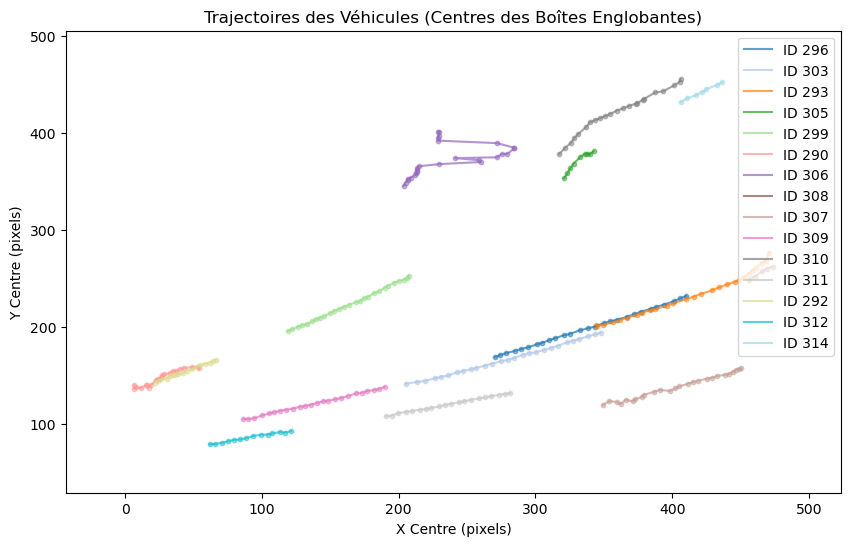

In [17]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Set the backend for Jupyter to display static plots
%matplotlib inline

# Load your data
data = pd.read_parquet('data1.parquet')
data=data.head(300)

# Calculate the center of each bounding box
data['x_centre'] = (data['x_min'] + data['x_max']) / 2
data['y_centre'] = (data['y_min'] + data['y_max']) / 2

# Sort data by timestamp and frame_id to ensure correct trajectory order
data = data.sort_values(by=['timestamp', 'frame_id'])

# Debugging: Check if data is loaded and centers are calculated
print("Data with centers:", data[['x_centre', 'y_centre', 'track_id']].head())

# Define the dimensions of the camera field
x_min_global = data['x_centre'].min() - 50
x_max_global = data['x_centre'].max() + 50
y_min_global = data['y_centre'].min() - 50
y_max_global = data['y_centre'].max() + 50

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Generate unique colors for each track_id
unique_track_ids = data['track_id'].unique()
colors = plt.cm.get_cmap('tab20', len(unique_track_ids))
track_id_to_color = {track_id: colors(i) for i, track_id in enumerate(unique_track_ids)}

# Plot trajectories (lines) and positions (points) for each track_id
for track_id in unique_track_ids:
    track_data = data[data['track_id'] == track_id]
    # Plot the trajectory as a line
    ax.plot(track_data['x_centre'], track_data['y_centre'], 
            color=track_id_to_color[track_id], label=f'ID {int(track_id)}', alpha=0.7)
    # Plot the points (centers) with a slight transparency
    ax.scatter(track_data['x_centre'], track_data['y_centre'], 
               color=track_id_to_color[track_id], s=10, alpha=0.5)

# Set axis limits and labels
ax.set_xlim(x_min_global, x_max_global)
ax.set_ylim(y_min_global, y_max_global)
ax.set_xlabel('X Centre (pixels)')
ax.set_ylabel('Y Centre (pixels)')
ax.set_title('Trajectoires des Véhicules (Centres des Boîtes Englobantes)')

# Add a legend for track_ids
ax.legend(loc='upper right')

# Display the plot
plt.show()